## Gun Violence in America
Spring 2024 Data Science Project

Evan Zhao  &  Jessica Wu  &  Tony Liao

**Member 1: Evan Zhao**, Contribution: 100%

**Member 2: Jessica Wu**, Contribution: 100%

**Member 3: Tony Liao**, Contribution: 100%

We, all team members, agree together that the above information is true, and we are confident about our contributions to this submitted project/final tutorial.

**Evan Zhao & Jessica Wu & Tony Liao**

**May 7, 2024**

**Evan:** I focused on implementing our data preprocessing and data exploration. I helped to revise the ML design as well as its training and testing, and I also helped to edit the visualization, analysis, and conclusion.

**Jessica:** I helped to filter the data and also contributed to a portion of the data exploration. I focused on the ML design along with its training, testing, and linear regression visualization. I also helped with editing the analysis and conclusion sections.

**Tony:** I helped to organize the dataset and revise some of the data exploration. I focused on the linear regression visualization after contributing to the ML design’s training and testing, then analyzed and drew conclusions based on the results.

Each of us equally contributed to the final project. After collectively compromising on a project idea, we each led certain parts of the deliverable and helped to edit and revise one another’s sections.

Gun violence has been and still is a very hotly debated political topic. With gun violence on the rise in the US, it has become increasingly necessary to understand where, and more importantly why this is occurring, so that we know where and how to remedy the problem. In our project, we aim to look at the amount of gun violence in each US state, as well as analyze which states experience the most gun violence. We do this by taking readers through the data science lifecycle of data collection, data processing, exploratory analysis, machine learning modeling, and result interpreting. In addition to looking at the figures for gun violence rates, we also aim to dive deeper into one of the potential reasons, that being the unemployment rate in a given area to determine if it is a driving factor for gun violence. Through this analysis, we hope to better understand gun violence rates in the US, where gun violence is most likely to occur, as well as whether or not unemployment correlates with gun crime rates. We also hope to identify unemployment as a root cause of gun violence, so that we may know how to begin addressing the causes.

"US Gun Violence 2014-2023" dataset: https://www.kaggle.com/datasets/konivat/us-gun-violence-archive-2014

"Unemployment in America" dataset: https://www.kaggle.com/datasets/justin2028/unemployment-in-america-per-us-state?resource=download

### Dataset Curation and Preprocessing

We will first collect and process the US Gun Violence dataset.

NOTE: we will load in the second data set later on and merge the 2 data sets into one with columns state, year, # gun crimes, and % unemployed

In [ ]:
# import libraries
import pandas as pd
import calendar
import datetime
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats


In [ ]:
# import datasets
df = pd.read_csv('US-Gun-Violence.csv')

display(df)

,incident_id,incident_date,state,city_or_county,address,killed,injured
0,2639130,June 30 2023,California,Florin,7870 Florin Rd,0,4.0
1,2639623,June 30 2023,Illinois,Chicago,6300 block of S Artesian Ave,1,3.0
2,2638784,June 29 2023,Texas,Odessa,4310 N Dixie Blvd,1,4.0
3,2638465,June 28 2023,North Carolina,Greensboro,5100 Bayberry St,3,2.0
4,2636671,June 26 2023,Michigan,Ypsilanti,800 block of George Pl,2,2.0
...,...,...,...,...,...,...,...
4368,95550,January 12 2014,Alabama,Huntsville,University Drive,0,5.0
4369,95146,January 11 2014,Mississippi,Jackson,3430 W. Capitol Street,0,4.0
4370,94514,January 5 2014,Pennsylvania,Erie,829 Parade St,1,3.0
4371,92704,January 3 2014,New York,Queens,Farmers Boulevard and 133rd Avenue,1,3.0


We begin by dropping duplicate rows from the data. Then, from the count() method, we see that there are missing values for addresses and injuries. However, we will not be utilizing the addresses, and we will not bother with imputation for the 'injured' column because only 2/4373 are missing. We then re-format the dates to be datetime objects.

In [ ]:
# drop duplicates and check for missing values
df = df.drop_duplicates()
print(df.count())

incident_id       4373
incident_date     4373
state             4373
city_or_county    4373
address           4360
killed            4373
injured           4371
dtype: int64


In [ ]:
# re-formatting dates
month_map = {month: index for index, month in enumerate(calendar.month_name) if month}

def convert_datetime(date):
  start = 0
  end = 0
  while date[end] != ' ':
    end += 1

  month = month_map[date[start:end]]

  start = end + 1
  end = start
  while date[end] != ' ':
    end += 1
  day = int(date[start:end])

  start = end + 1
  year = int(date[start:])

  return datetime.datetime(year, month, day)

df['incident_date'] = df['incident_date'].apply(convert_datetime)
display(df)

,incident_id,incident_date,state,city_or_county,address,killed,injured
0,2639130,2023-06-30,California,Florin,7870 Florin Rd,0,4.0
1,2639623,2023-06-30,Illinois,Chicago,6300 block of S Artesian Ave,1,3.0
2,2638784,2023-06-29,Texas,Odessa,4310 N Dixie Blvd,1,4.0
3,2638465,2023-06-28,North Carolina,Greensboro,5100 Bayberry St,3,2.0
4,2636671,2023-06-26,Michigan,Ypsilanti,800 block of George Pl,2,2.0
...,...,...,...,...,...,...,...
4368,95550,2014-01-12,Alabama,Huntsville,University Drive,0,5.0
4369,95146,2014-01-11,Mississippi,Jackson,3430 W. Capitol Street,0,4.0
4370,94514,2014-01-05,Pennsylvania,Erie,829 Parade St,1,3.0
4371,92704,2014-01-03,New York,Queens,Farmers Boulevard and 133rd Avenue,1,3.0


### Data Exploration and Summary Statistics

The next step in the data lifecycle is an exploratory analysis of our data. Our dataset represents gun violence in the US, specifically looking at number of incidents, injuries, and fatalities that occurred due to gun related events from 2014-2023. In our data analysis, we explore four different conclusions: which states are the most represented in the dataset and thus have the most gun crime, whether the top 3 states with the most gun crimes have significantly different amounts of gun-related injuries, gun violence related fatalities by year, and gun violence related injuries by year. In terms of entries, our dataset contains 4372 entries recorded from 2014 to 2023. The features of the dataset are the date of the incident, the location (state, county, and street), number of people injured, and number of people killed. One feature of our data that could be over represented would be the number of incidents per state or county. Since our dataset only includes incidents that were reported, there may be certain areas where much of the gun related crimes go unreported, which may lead to a lower result when analyzing. There also may simply be more incidents where there are more people, so states and counties that have higher populations and population densitites may experience higher number of incidents, but lower overall incidents per capita. There aren't necessarily outliers in the dataset, however a single mass shooting event may make it seem like one given state or county experiences more gun violence than another state with multiple smaller incidents. In this case we can't ignore the single mass shooting event, however it may be seen as an outlier when it comes to analyzing the data.

We begin by looking at which states had the most gun violence according to our dataset. To determine this, we simply check the counts of each state in the dataset to find which one is the most represented, then represent this with a pie plot.

state
Illinois                440
California              396
Texas                   300
Florida                 254
Pennsylvania            209
Louisiana               200
New York                198
Ohio                    171
Georgia                 171
Tennessee               139
Missouri                137
Michigan                136
Maryland                134
North Carolina          133
South Carolina          111
Alabama                 110
New Jersey              102
Virginia                101
Mississippi              94
Indiana                  92
District of Columbia     69
Colorado                 66
Wisconsin                59
Arizona                  53
Minnesota                53
Kentucky                 53
Washington               50
Arkansas                 48
Massachusetts            35
Oklahoma                 33
Nevada                   32
Connecticut              29
New Mexico               26
Oregon                   24
Kansas                   23
Delaware      

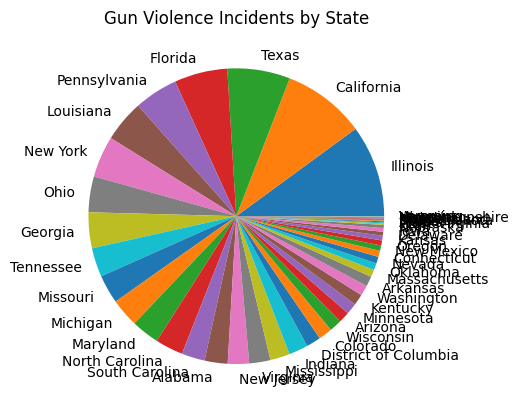

In [ ]:
# states with the most gun violence
occurrences = df['state'].value_counts()
print(occurrences)

occurrences.plot(kind='pie')
plt.title('Gun Violence Incidents by State')
plt.ylabel('')
plt.show()

This pie chart represents the total number of gun violence incidents per state from the entire dataset. We can see that Illinois has the largest pie slice meaning it has the most number of gun violence incidents in the US from 2014-2023. California and Texas have the second and third most incidents, and the following states in the pie chart in a counter-clockwise direction have less incidents.

We will now use 1-way ANOVA signficance test to analyze the differences in the mean number of gun crime injuries in our top 3 most represented states in the gun crimes dataset, which we previously found from the pie chart to be Illinois, Texas, and California.

Null hypothesis: The mean number of gun crimes injuries in the states Illinois, California, and Texas are not significantly different from the other states.

Alternative hypothesis: At least one of the mean number of gun crimes injuries in the states Illinois, California, and Texas are significantly different from the other states.

In [ ]:
# only select rows with states equal to the top 3 states
# convert state names from strings to integers for the ANOVA test
states = ['Illinois', 'Texas', 'California']
df_top3 = df.loc[(df['state'] == states[0]) | (df['state'] == states[1]) | (df['state'] == states[2])]
df_top3_copy = df_top3.copy(deep=True)
df_top3_copy.sort_values('state')
df_top3_copy['state'].replace(states, [0, 1, 2], inplace=True)
df_top3_copy

,incident_id,incident_date,state,city_or_county,address,killed,injured
0,2639130,2023-06-30,2,Florin,7870 Florin Rd,0,4.0
1,2639623,2023-06-30,0,Chicago,6300 block of S Artesian Ave,1,3.0
2,2638784,2023-06-29,1,Odessa,4310 N Dixie Blvd,1,4.0
6,2635065,2023-06-25,1,Missouri City,7242 W Fuqua St,1,3.0
11,2634357,2023-06-24,1,Beaumont,1600 block of Glasshouse St,0,5.0
...,...,...,...,...,...,...,...
4351,106481,2014-02-12,2,Oakland,37th and International,1,3.0
4354,104218,2014-02-05,0,Chicago,6740 N Clark St,1,3.0
4358,100434,2014-01-25,0,Chicago,S Union Ave and W 51st St,1,4.0
4364,96792,2014-01-14,2,Los Angeles,West 86th Street,0,4.0


In [ ]:
anova = stats.f_oneway(df_top3_copy['state'], df_top3_copy['injured'])
print(anova.pvalue)

4.746456346787245e-272


Since our p-value for the test was significantly lower than the default significance value of 0.05, we reject the null hypothesis of all the mean number of gun injuries being the same in our top 3 states.

We then try to determine which year had the most gun crime related fatalities based on the dataset. To do this, we must modify the dataframe to have an incident year column, which can be created from the incident date column. From there, we can get the total gun violence related injuries for each year by grouping the dataframe by the new incident year column.

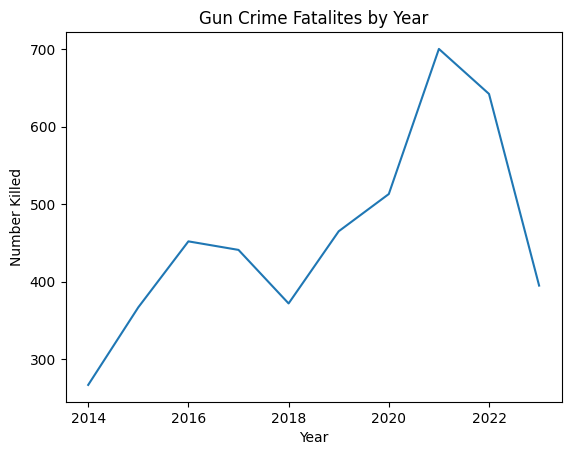

incident_date
2014-01-01    2
2014-01-03    1
2014-01-05    1
2014-01-11    0
2014-01-12    0
             ..
2023-06-25    7
2023-06-26    2
2023-06-28    3
2023-06-29    1
2023-06-30    1
Name: killed, Length: 2151, dtype: int64

incident_year
2014    267
2015    367
2016    452
2017    441
2018    372
2019    465
2020    513
2021    700
2022    642
2023    395
Name: killed, dtype: int64

In [ ]:
def get_year(date):
  return date.year
def get_month(date):
  return date.month
def get_day(date):
  return date.day

df2 = df.copy(deep=True)
df2['incident_year'] = df2['incident_date'].apply(get_year)
df2['incident_month'] = df2['incident_date'].apply(get_month)
df2['incident_day'] = df2['incident_date'].apply(get_day)
years_killed = df2.groupby('incident_year')['killed'].sum()
years_killed.sort_values()
years_killed.plot.line(xlabel="Year", ylabel="Number Killed", title='Gun Crime Fatalites by Year')
plt.show()

display(df.groupby('incident_date')['killed'].sum())
display(years_killed)
# NOTE: The decrease in 2023 could be due to only half of 2023 being included

For finding which year had the most gun crime related injuries, we do the same process but for injuries rather than fatalities.

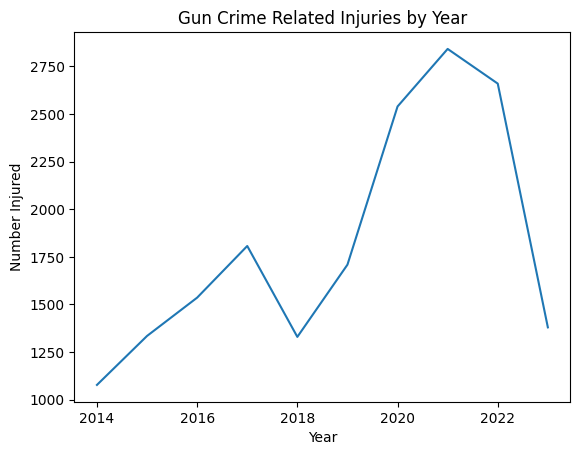

incident_date
2014-01-01     2.0
2014-01-03     3.0
2014-01-05     3.0
2014-01-11     4.0
2014-01-12    16.0
              ... 
2023-06-25    18.0
2023-06-26     2.0
2023-06-28     2.0
2023-06-29     4.0
2023-06-30     7.0
Name: injured, Length: 2151, dtype: float64

incident_year
2014    1078.0
2015    1335.0
2016    1536.0
2017    1807.0
2018    1330.0
2019    1709.0
2020    2539.0
2021    2841.0
2022    2659.0
2023    1380.0
Name: injured, dtype: float64

In [ ]:
years_injured = df2.groupby('incident_year')['injured'].sum()
years_injured.sort_values()
years_injured.plot.line(xlabel="Year", ylabel="Number Injured", title='Gun Crime Related Injuries by Year')
plt.show()
display(df.groupby('incident_date')['injured'].sum())
display(years_injured)
# NOTE: The decrease in 2023 could be due to only half of 2023 being included

Looking at both graphs, there is a peak in gun crime related deaths and injuries during 2021, then some drop at 2022. The drop continues to 2023, but that is likely due to only about half of 2023's data being recorded. Looking at the data, the final date is 06/30/2023. Thus, we can conclude that from 2014 to the middle of 2023, there were the most gun crime related deaths and injuries in 2021.


### Modeling: Primary Analysis with Machine Learning

As the next step, we will be analyzing one of the factors behind gun crime: unemployment. We do this by building a machine learning model.

Load in the new dataset about unemployment in each US state since 1976.

In [ ]:
df_unemployed = pd.read_csv('Unemployment_in_America_Per_US_State.csv')
display(df_unemployed)

,FIPS Code,State/Area,Year,Month,Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Percent (%) of State/Area's Population,Total Employment in State/Area,Percent (%) of Labor Force Employed in State/Area,Total Unemployment in State/Area,Percent (%) of Labor Force Unemployed in State/Area
0,1,Alabama,1976,1,"2,605,000","1,484,555",57.0,"1,386,023",53.2,"98,532",6.6
1,2,Alaska,1976,1,"232,000","160,183",69.0,"148,820",64.1,"11,363",7.1
2,4,Arizona,1976,1,"1,621,000","964,120",59.5,"865,871",53.4,"98,249",10.2
3,5,Arkansas,1976,1,"1,536,000","889,044",57.9,"824,395",53.7,"64,649",7.3
4,6,California,1976,1,"15,621,000","9,774,280",62.6,"8,875,685",56.8,"898,595",9.2
...,...,...,...,...,...,...,...,...,...,...,...
29887,51,Virginia,2022,12,"6,862,585","4,470,272",65.1,"4,330,531",63.1,"139,741",3.1
29888,53,Washington,2022,12,"6,254,253","4,015,286",64.2,"3,832,769",61.3,"182,517",4.5
29889,54,West Virginia,2022,12,"1,434,789","784,323",54.7,"752,464",52.4,"31,859",4.1
29890,55,Wisconsin,2022,12,"4,753,700","3,068,610",64.6,"2,976,670",62.6,"91,940",3.0


Next, we clean the data by dropping duplicates and checking for missing values.

In [ ]:
df_unemployed = df_unemployed.drop_duplicates()
print(df_unemployed.count()) # no missing values found

FIPS Code                                                    29892
State/Area                                                   29892
Year                                                         29892
Month                                                        29892
Total Civilian Non-Institutional Population in State/Area    29892
Total Civilian Labor Force in State/Area                     29892
Percent (%) of State/Area's Population                       29892
Total Employment in State/Area                               29892
Percent (%) of Labor Force Employed in State/Area            29892
Total Unemployment in State/Area                             29892
Percent (%) of Labor Force Unemployed in State/Area          29892
dtype: int64


Since all values from the count() method are the same, we conclude there are no missing values and move on to merging the gun crime and unemployment datasets with the information we desire: The percentage of people unemployed in each state in a given month/year, and the total gun crime incidents in that state during that same month/year.

In [ ]:
# initializing merged dataset as dict
keys = ['State', 'Year', 'Month', '% Unemployed', '# Gun Crimes']
data_dict = {k:[] for k in keys}

# get all States and the Years we're analyzing
# We will use all states listed in the gun_violence dataset
# Since the gun violence dataset only has data from 2014 to mid 2023, we
# will only use the years 2014 to 2022
states = sorted(df['state'].unique())
years = sorted(df2['incident_year'].unique())[:-1]
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# get % unemployed and # gun crimes each year for every state
for s in states:
  for y in years:
    for m in months:
      # calculate % unemployed and # gun crimes in current state at current year
      curr_unemployed = df_unemployed.loc[(df_unemployed['Month'] == m) & (df_unemployed['State/Area'] == s) & (df_unemployed['Year'] == y), 'Percent (%) of Labor Force Unemployed in State/Area'].mean()
      curr_guns_injured = df2.loc[(df2['incident_month'] == m) & (df2['state'] == s) & (df2['incident_year'] == y), 'injured'].sum()
      curr_guns_killed = df2.loc[(df2['incident_month'] == m) & (df2['state'] == s) & (df2['incident_year'] == y), 'killed'].sum()
      curr_guns_total = curr_guns_injured + curr_guns_killed
      # NOTE: in tests we got no NaN values for curr_unemployed or curr_guns_total

      # update the dictionary
      data_dict['State'].append(s)
      data_dict['Year'].append(y)
      data_dict['Month'].append(m)
      data_dict['% Unemployed'].append(curr_unemployed)
      data_dict['# Gun Crimes'].append(curr_guns_total)

# create the final dataframe
df_merged = pd.DataFrame.from_dict(data_dict)
df_merged


,State,Year,Month,% Unemployed,# Gun Crimes
0,Alabama,2014,1,7.2,5.0
1,Alabama,2014,2,7.1,0.0
2,Alabama,2014,3,7.1,0.0
3,Alabama,2014,4,7.0,0.0
4,Alabama,2014,5,6.9,0.0
...,...,...,...,...,...
5395,Wyoming,2022,8,3.7,0.0
5396,Wyoming,2022,9,3.8,0.0
5397,Wyoming,2022,10,3.9,0.0
5398,Wyoming,2022,11,3.9,0.0


For developing our ML model, we used a linear regression model to, based on the percent of people who are unemployed, predict the amount of gun crimes that will be committed in the top 3 states with the most gun violence that we established earlier. From this, we will be able to predict whether a rise in unemployment will increase or decrease gun crimes in those areas. Building this model will help us understand the relationship between unemployment and gun violence. We could then possibly use this data to determine whether a city or state would need to increase monitoring and security in public areas during times of high unemployment, if gun violence tends to increase with increased unemployment within that area.

We first reshape the data.

In [ ]:
# Illinois
il = df_merged[df_merged['State'] == 'Illinois']
ilX = il['% Unemployed'].to_numpy().reshape(-1, 1)
ilY = il['# Gun Crimes'].to_numpy().reshape(-1, 1)
print(il)

# California
ca = df_merged[df_merged['State'] == 'California']
caX = ca['% Unemployed'].to_numpy().reshape(-1, 1)
caY = ca['# Gun Crimes'].to_numpy().reshape(-1, 1)
print(ca)

# Texas
tx = df_merged[df_merged['State'] == 'Texas']
txX = tx['% Unemployed'].to_numpy().reshape(-1, 1)
txY = tx['# Gun Crimes'].to_numpy().reshape(-1, 1)
print(tx)

         State  Year  Month  % Unemployed  # Gun Crimes
1404  Illinois  2014      1           8.4          10.0
1405  Illinois  2014      2           8.1           4.0
1406  Illinois  2014      3           7.9           6.0
1407  Illinois  2014      4           7.6          26.0
1408  Illinois  2014      5           7.4           8.0
...        ...   ...    ...           ...           ...
1507  Illinois  2022      8           4.5          27.0
1508  Illinois  2022      9           4.6          21.0
1509  Illinois  2022     10           4.6          28.0
1510  Illinois  2022     11           4.6          21.0
1511  Illinois  2022     12           4.6          13.0

[108 rows x 5 columns]
          State  Year  Month  % Unemployed  # Gun Crimes
432  California  2014      1           8.2           4.0
433  California  2014      2           8.1          18.0
434  California  2014      3           8.0          15.0
435  California  2014      4           7.8           8.0
436  California  20

Now we will begin the training and testing process.

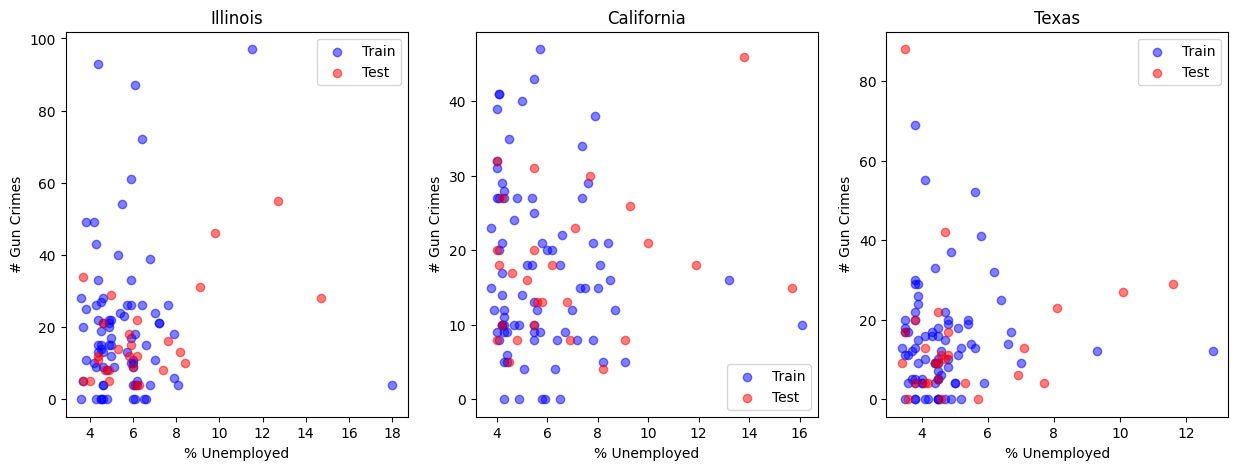

In [ ]:
# imports
from sklearn.model_selection import train_test_split

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Illinois
ilX_train, ilX_test, ilY_train, ilY_test = train_test_split(ilX, ilY, random_state=np.random.seed(42))
axes[0].scatter(ilX_train, ilY_train, color='blue', label='Train', alpha=0.5)
axes[0].scatter(ilX_test, ilY_test, color='red', label='Test', alpha=0.5)
axes[0].set_title('Illinois')
axes[0].set_xlabel('% Unemployed')
axes[0].set_ylabel('# Gun Crimes')
axes[0].legend()

# California
caX_train, caX_test, caY_train, caY_test = train_test_split(caX, caY, random_state=np.random.seed(42))
axes[1].scatter(caX_train, caY_train, color='blue', label='Train', alpha=0.5)
axes[1].scatter(caX_test, caY_test, color='red', label='Test', alpha=0.5)
axes[1].set_title('California')
axes[1].set_xlabel('% Unemployed')
axes[1].set_ylabel('# Gun Crimes')
axes[1].legend()

# Texas
txX_train, txX_test, txY_train, txY_test = train_test_split(txX, txY, random_state=np.random.seed(42))
axes[2].scatter(txX_train, txY_train, color='blue', label='Train', alpha=0.5)
axes[2].scatter(txX_test, txY_test, color='red', label='Test', alpha=0.5)
axes[2].set_title('Texas')
axes[2].set_xlabel('% Unemployed')
axes[2].set_ylabel('# Gun Crimes')
axes[2].legend()

We need to generate our lines of best fit.

In [ ]:
# imports
from sklearn.linear_model import LinearRegression

# generate lines of best fit
ilL = LinearRegression()
ilL.fit(ilX_train, ilY_train)

caL = LinearRegression()
caL.fit(caX_train, caY_train)

txL = LinearRegression()
txL.fit(txX_train, txY_train)

il_train_pred = ilL.predict(ilX_train)
ca_train_pred = caL.predict(caX_train)
tx_train_pred = txL.predict(txX_train)

il_test_pred = ilL.predict(ilX_test)
ca_test_pred = caL.predict(caX_test)
tx_test_pred = txL.predict(txX_test)

### Visualization

We continue on to visualizing our findings. Here are the final linear regression models, with the percent (%) of labor force unemployed as the independent variable and the number of gun crime incidents as the dependent variable.

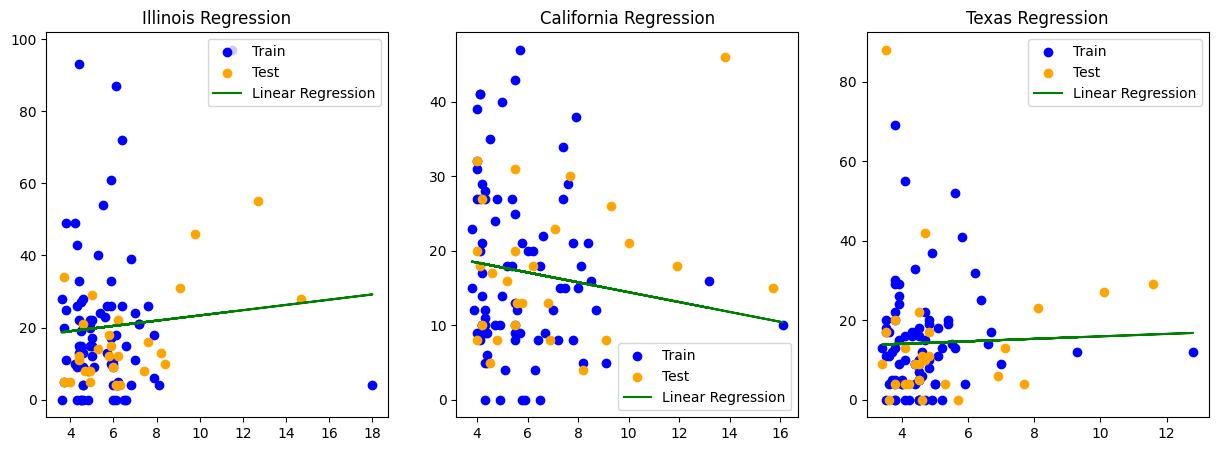

In [ ]:
# plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Illinois
axes[0].scatter(ilX_train, ilY_train, color='blue', label='Train')
axes[0].scatter(ilX_test, ilY_test, color='orange', label='Test')
axes[0].plot(ilX_train, il_train_pred, color='green', label='Linear Regression')
axes[0].set_title('Illinois Regression')
axes[0].legend()

# California
axes[1].scatter(caX_train, caY_train, color='blue', label='Train')
axes[1].scatter(caX_test, caY_test, color='orange', label='Test')
axes[1].plot(caX_train, ca_train_pred, color='green', label='Linear Regression')
axes[1].set_title('California Regression')
axes[1].legend()

# Texas
axes[2].scatter(txX_train, txY_train, color='blue', label='Train')
axes[2].scatter(txX_test, txY_test, color='orange', label='Test')
axes[2].plot(txX_train, tx_train_pred, color='green', label='Linear Regression')
axes[2].set_title('Texas Regression')
axes[2].legend()

Oof that's rough!

We should perform some further analysis on our results. R² is a statistical method that determines the goodness of fit. It measures the strength of the relationship between the dependent and independent variables by measuring the amount of variance in the dependent variable captured by the model. When R²=0, the model doesn't capture any variance which means it is not a good fit. When R²=1, the model explains all variance in data which means it is a perfect fit.

In [ ]:
# import
from sklearn.metrics import r2_score

r2_il_train = r2_score(ilY_train, il_train_pred)
r2_il_test = r2_score(ilY_test, il_test_pred)
r2_ca_train = r2_score(caY_train, ca_train_pred)
r2_ca_test = r2_score(caY_test, ca_test_pred)
r2_tx_train = r2_score(txY_train, tx_train_pred)
r2_tx_test = r2_score(txY_test, tx_test_pred)

print("Illinois:")
print("R2 Train:" + str(r2_il_train))
print("R2 Test:" + str(r2_il_test))

print("\nCalifornia:")
print("R2 Train:" + str(r2_ca_train))
print("R2 Test:" + str(r2_ca_test))

print("\nTexas:")
print("R2 Train:" + str(r2_tx_train))
print("R2 Test:" + str(r2_tx_test))

Illinois:
R2 Train:0.004625712319068276
R2 Test:0.050702971581335854

California:
R2 Train:0.01421261663481499
R2 Test:-0.1695412545269186

Texas:
R2 Train:0.001014489393481699
R2 Test:0.0035809242992597135


Unfortunately, we can see that the line of best fit for California is negative with an R-squared value of -0.1695. This indicates an extremely weak and almost opposite relationship between the % unemployed and number of gun crimes in California. Texas also has near-zero R-squared values, indicating a poor fit and coorelation between the variables. Illinois seems to have slightly higher R-squared values, which can indicate a tiny relationship between the variables. However, none of these values are even close to 1, which means the unemployment rates can barely explain the number of gun crimes.

### Insights and Conclusion

As the final step in the lifecycle, we explain our insights and conclusions.Based on the results of our study, a reader might be able to somewhat plausibly conclude that there is some slight correlation between unemployment and the number of gun crimes in the states we analyzed. However, it’s important to note that gun violence in America is a much more nuanced subject, which could explain why our correlations aren’t the strongest. An important takeaway that readers should understand is that a broader study involving more factors such as state politics is necessary for a more holistic understanding of gun violence. For the data science process, our work highlights the importance of capturing all aspects of whatever subject the data scientist is studying and the difficulty of choosing very nuanced subjects for study like gun violence in America.